In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%run -i "../utils.py"

In [3]:
df_baseline_1 = pd.read_csv("./ScoredBaseline-1.csv")
df_baseline_1.describe()

,Score
count,27.000000
mean,82.767607
std,142.378803
min,0.000000
25%,7.437500
50%,29.000000
75%,94.318182
max,693.333333


count     27.000000
mean      82.767607
std      142.378803
min        0.000000
25%        7.437500
50%       29.000000
75%       94.318182
max      693.333333
Name: Score, dtype: float64
Threshold: 693.3333333333334 - Accuracy: 81.48%


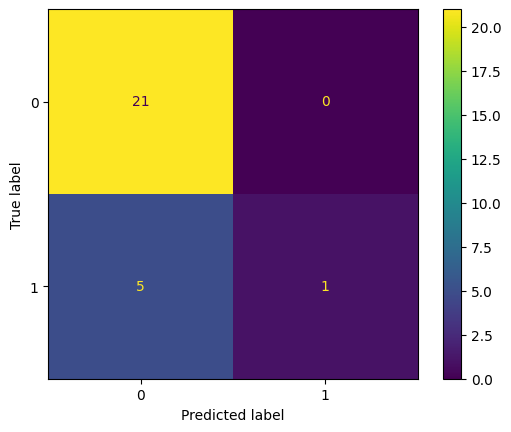


Threshold: 82.76760739260739 - Accuracy: 74.07%


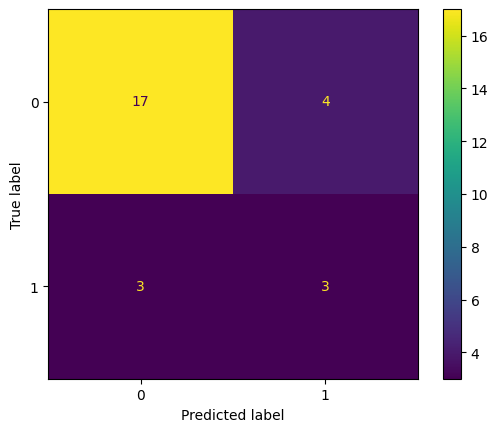


Threshold: 94.31818181818181 - Accuracy: 74.07%


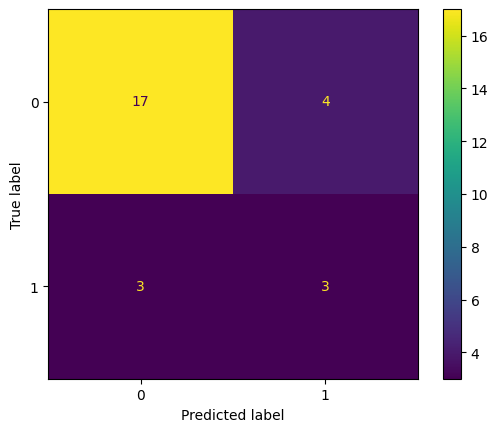


Threshold: 29.0 - Accuracy: 62.96%


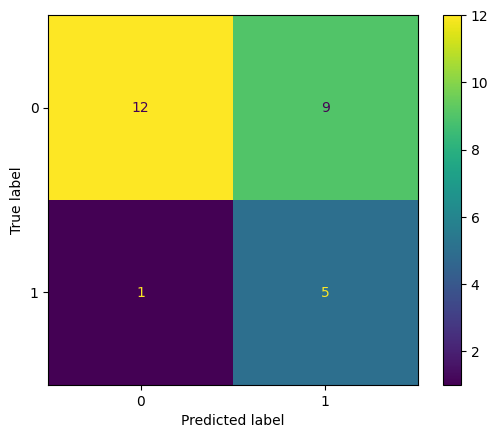


Threshold: 7.4375 - Accuracy: 48.15%


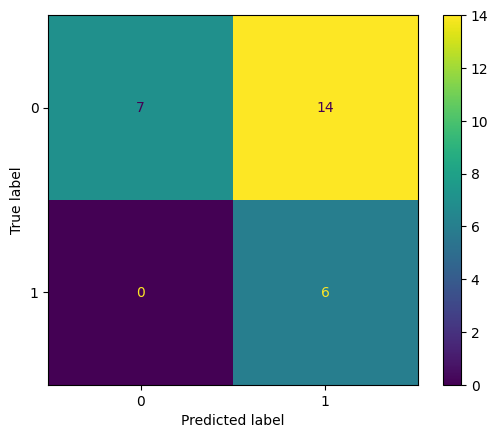


Threshold: 0.0 - Accuracy: 22.22%


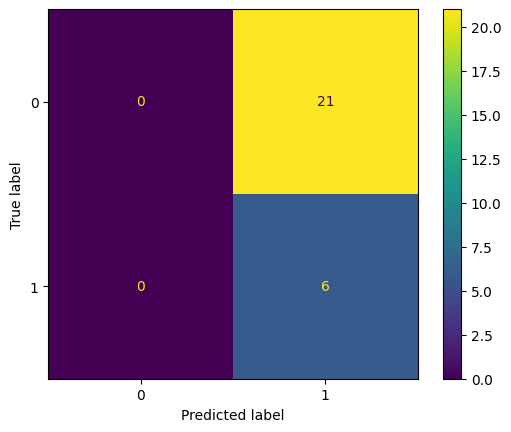

In [11]:
stat_names = ['min', 'mean', 'max', '25%', '50%', '75%']
stats= df_baseline_1.describe()['Score']
print(stats)

all_measurements = []

for stat in stat_names:
    m = measure_method_by_threshold(
        output_fp="./ScoredBaseline-1.csv", 
        output_threshold=stats[stat],
        target_threshold=3, 
        verbose=False
    )
    all_measurements.append((stats[stat], m))

all_measurements.sort(key=lambda m: m[-1]['accuracy'], reverse=True)
for m in all_measurements:
    print(f"Threshold: {m[0]} - Accuracy: {m[-1]['accuracy']* 100:.2f}%")
    cm = ConfusionMatrixDisplay(confusion_matrix=m[-1]['confusion_matrix'])
    cm.plot()
    plt.show()
    print()